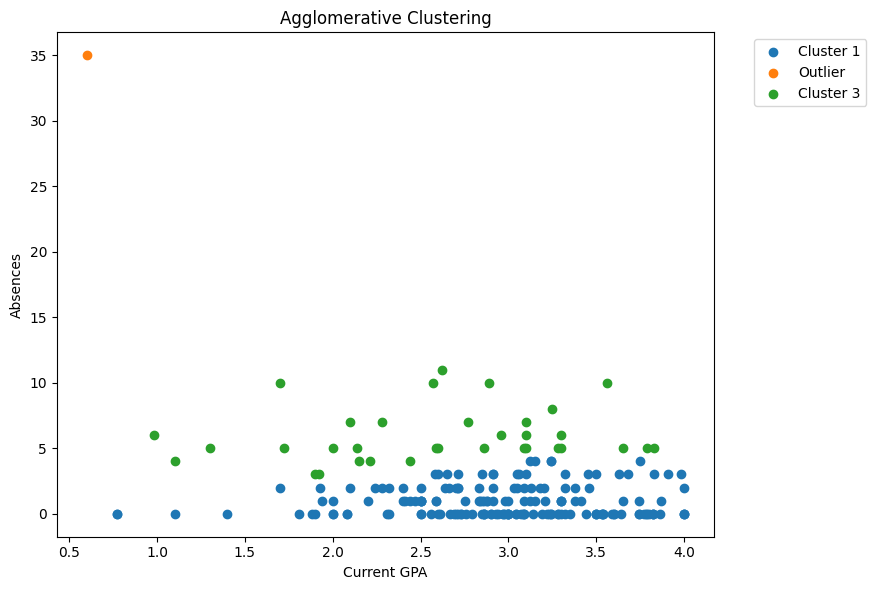

Silhouette Score:  0.6205316054790453


In [2]:
import pandas as pd
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

file_path = 'UpdatedStudentSurvey.xlsx'  # replace with your file path
df = pd.read_excel(file_path)
X = df[['Current GPA', 'Absences']].values

# define the model
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)

plt.figure(figsize=(12, 6))

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    label = 'Outlier' if cluster == 1 else f'Cluster {cluster + 1}'
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=label)

# show the plot
plt.xlabel('Current GPA')
plt.ylabel('Absences')
plt.title('Agglomerative Clustering')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()

sil_score = silhouette_score(X, yhat)
print("Silhouette Score: ", sil_score)
